# Driver Attention Monitor System (DAMS)

Driver states: NORMAL/TIRED/DISTRACTED


---

**DISTRACTED STATE**
<br>
*Tracking head position (eyes-on-road), eyes blink frequency*
<br>
*   Head pose: PRE-TRAINED head-pose-estimation-adas-0001 (https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/intel/head-pose-estimation-adas-0001/README.md)<br>
*   Blink: https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new

---
**NORMAL/TIRED STATE**
<br>
*Fatigue face detection*
<br>
*   Drowsiness/fatigue detection: Driver Drowsiness Dataset (DDD) (https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset)
*   Drowsiness prediction dataset (https://www.kaggle.com/datasets/rakibuleceruet/drowsiness-prediction-dataset)




conda activate MFDP && cd E:/MFDP && E: && jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0 --notebook-dir=E:/MFDP

# Head pose

In [1]:
import argparse
import cv2
import numpy as np
from openvino.inference_engine import IENetwork, IECore


# load the input image
input_ok = cv2.imread('datasets/Driver Drowsiness Dataset (DDD)/Non Drowsy/a0002.png')
input_distracted = cv2.imread('sample-images/looking-away.jpg')

# load the IR model
model_xml = "models/head-pose-estimation-adas-0001/head-pose-estimation-adas-0001.xml"
model_bin = "models/head-pose-estimation-adas-0001/head-pose-estimation-adas-0001.bin"
ie = IECore()
net = ie.read_network(model=model_xml, weights=model_bin)

In [2]:
def is_distracted(input_image, threshold_yaw=15, net=net):
    # Preprocess the image
    input_shape = net.input_info['data'].input_data.shape
    resized_image = cv2.resize(input_image, (input_shape[3], input_shape[2]))
    preprocessed_image = resized_image.transpose((2, 0, 1))
    preprocessed_image = preprocessed_image.reshape(input_shape)

    # Run inference on the image
    exec_net = ie.load_network(network=net, device_name='CPU', num_requests=1)
    inference_results = exec_net.infer(inputs={'data': preprocessed_image})

    # Extract the output probabilities
    yaw_prob = inference_results['angle_y_fc'][0][0]

    # Return 1 if the face is looking straight ahead, else return 0
    if abs(yaw_prob) < threshold_yaw:
        return False
    else:
        return True

In [ ]:
print(is_distracted(input_ok))
print(is_distracted(input_distracted))

False
True


# Eye detection & Blink classification

In [ ]:
img = cv2.imread('sample-images/looking-away.jpg')

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
def get_face(image_path):
    img = cv2.imread(image_path)
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray)

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("faces not detected")
    else:
        for ex, ey, ew, eh in facess:
            faces_roi = roi_color[ey:ey+eh, ex:ex+ew]

    return cv2.cvtColor(faces_roi, cv2.COLOR_BGR2RGB)

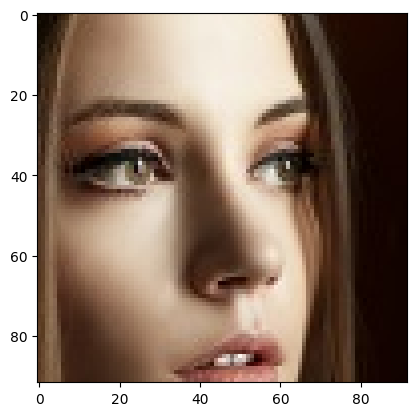

In [ ]:
plt.imshow(get_face('sample-images/looking-away.jpg'))

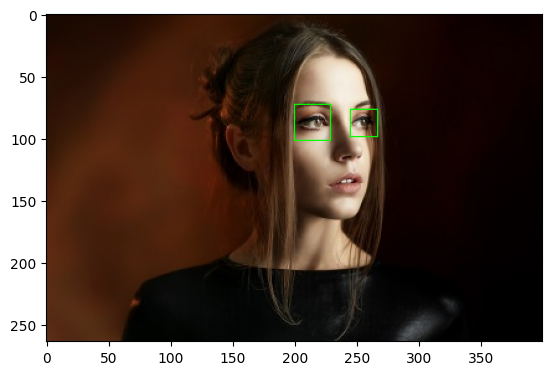

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

eyes not detected


(22, 22, 3)


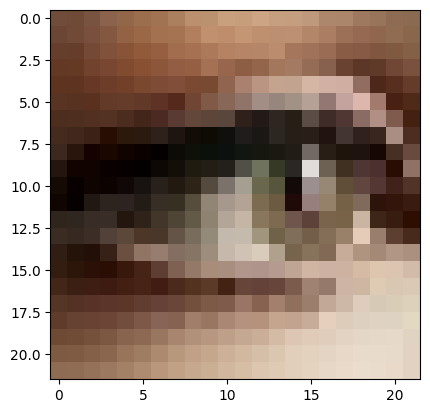

In [ ]:
print(eyes_roi.shape)
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp


mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs))

# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

E:\Miniconda3\envs\exp\lib\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
E:\Miniconda3\envs\exp\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [ ]:
image = cv2.imread("sample-images/looking-away.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
image = np.ascontiguousarray(image)
imgH, imgW, _ = image.shape

In [ ]:
# Running inference using static_image_mode
with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # Default=1
    refine_landmarks=False,         # Default=False
    min_detection_confidence=0.5,   # Default=0.5
    min_tracking_confidence= 0.5,   # Default=0.5
) as face_mesh:

    results = face_mesh.process(image)

# Indicates whether any detections are available or not.
print(bool(results.multi_face_landmarks))

True


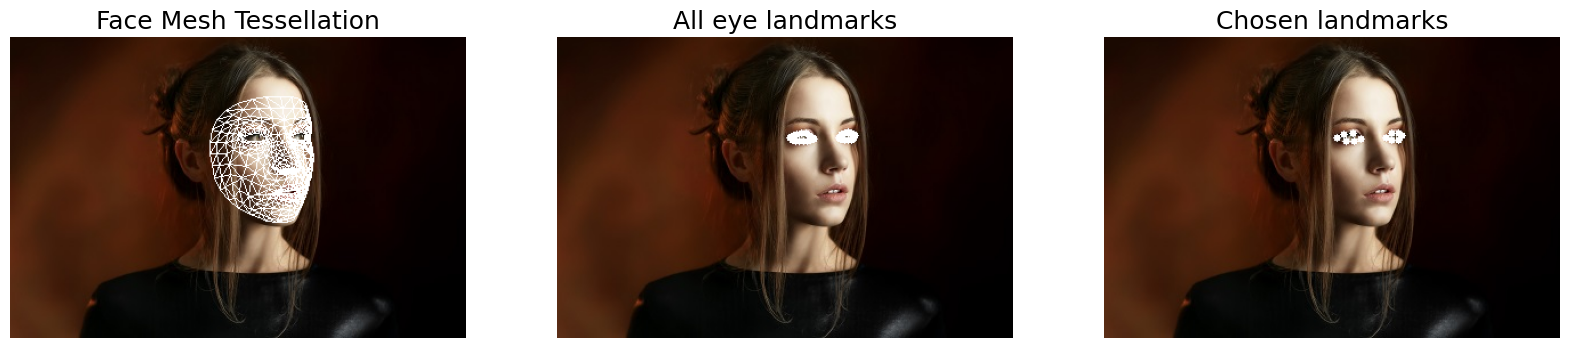

In [ ]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt

     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks

    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness,
        circle_radius=ts_circle_radius,
        color=(255, 255, 255)
    )

    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")

    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )

    # Get the object which holds the x, y, and z coordinates for each landmark
    landmarks = face_landmarks.landmark

    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.

    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(image_eye_lmks,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return

# If detections are available.
if results.multi_face_landmarks:

    # Iterate over detections of each face. Here, we have max_num_faces=1,
    # So there will be at most 1 element in
    # the 'results.multi_face_landmarks' list
    # Only one iteration is performed.

    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks)

In [ ]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.

    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame

    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y,
                                             frame_width, frame_height)
            coords_points.append(coord)

        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])

        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)

    except:
        ear = 0.0
        coords_points = None

    return ear, coords_points

In [ ]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""

    left_ear, left_lm_coordinates = get_ear(
                                      landmarks,
                                      left_eye_idxs,
                                      image_w,
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks,
                                      right_eye_idxs,
                                      image_w,
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0

    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

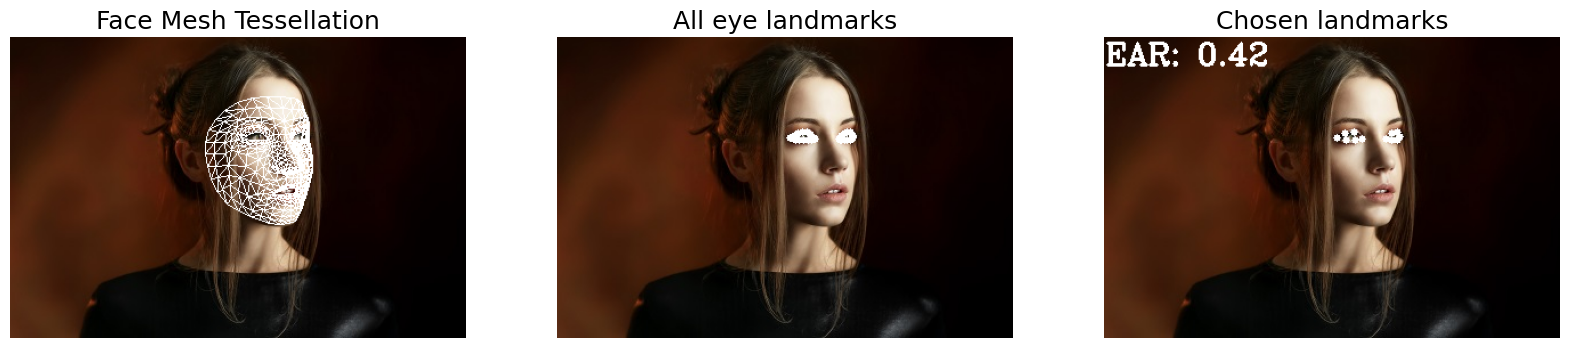

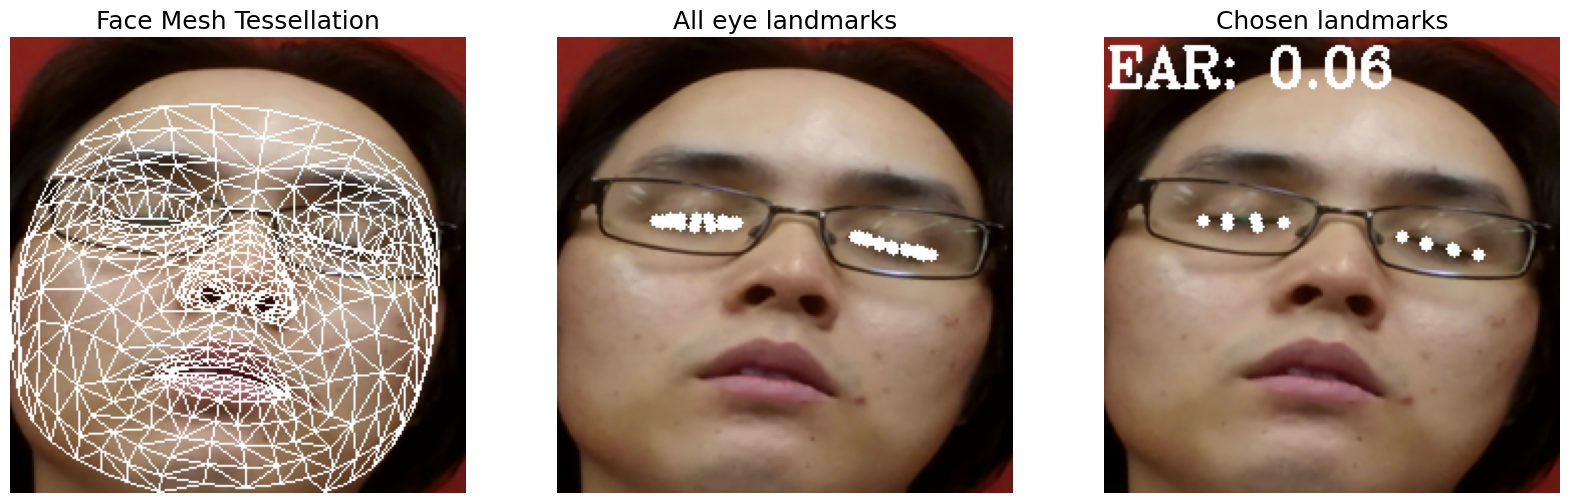

In [ ]:
image_eyes_open  = cv2.imread("sample-images/looking-away.jpg")[:, :, ::-1]
image_eyes_close = cv2.imread("datasets/Driver Drowsiness Dataset (DDD)/Drowsy/N0073.png")[:, :, ::-1]

for idx, image in enumerate([image_eyes_open, image_eyes_close]):

    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()

    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks

        # If detections are available.
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                EAR, _ = calculate_avg_ear(
                          landmarks,
                          chosen_left_eye_idxs,
                          chosen_right_eye_idxs,
                          imgW,
                          imgH
                      )

                # Print the EAR value on the custom_chosen_lmk_image.
                cv2.putText(custom_chosen_lmk_image,
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX,
                            0.9, (255, 255, 255), 2
                )

                plot(img_dt=image.copy(),
                     img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks,
                     ts_thickness=1,
                     ts_circle_radius=3,
                     lmk_circle_radius=3
                )

# DL model

In [1]:
import os
from PIL import Image
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((480, 480)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class TiredDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        self.drowsy_dir = os.path.join(root_dir, "Fatigue Subjects")
        self.non_drowsy_dir = os.path.join(root_dir, "Active Subjects")

        self.drowsy_files = [os.path.join(self.drowsy_dir, f) for f in os.listdir(self.drowsy_dir) if f.endswith('.jpg')]
        self.non_drowsy_files = [os.path.join(self.non_drowsy_dir, f) for f in os.listdir(self.non_drowsy_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.drowsy_files) + len(self.non_drowsy_files)

    def __getitem__(self, index):
        if index < len(self.drowsy_files):
            img_path = self.drowsy_files[index]
            label = 1
        else:
            img_path = self.non_drowsy_files[index - len(self.drowsy_files)]
            label = 0

        img = Image.open(img_path) # Image.fromarray(get_face(img_path))
        img = img.convert('RGB')
        if self.transform:
            img = self.transform(img)
        # img = torch.tensor(np.array(img)).permute(2, 0, 1).float() / 255.0

        return {'image': img, 'class': label}

dataset = TiredDataset("E:\\MFDP\\datasets\\FaceImages", transform=transform)

# Define the sizes of the train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Use random_split to split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(
    dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42) # Set a seed for reproducibility
)

# Create DataLoader objects for each set
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [ ]:
len(train_loader), len(val_loader), len(test_loader)

(912, 114, 114)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import torchvision.models as models

# Load the pre-trained MobileNetV3-Large model
# Prepare the model for the RP2K dataset
num_classes = 2
mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
mobilenet_v3_large.classifier[-1] = nn.Linear(mobilenet_v3_large.classifier[-1].in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mobilenet_v3_large.to(device)

In [ ]:
mobilenet_v3_large.load_state_dict(torch.load('models/mobilenetv3/mobilenet_v3_large.pth'))

<All keys matched successfully>

In [ ]:
# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenet_v3_large.parameters(), lr=0.001, momentum=0.9)

In [3]:
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for batch in tqdm(dataloader, desc="Training"):
        inputs = batch['image'].to(device)
        labels = batch['class'].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)

    return epoch_loss, epoch_acc

def test(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Testing"):
            inputs = batch['image'].to(device)
            labels = batch['class'].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)

    return epoch_loss, epoch_acc

In [ ]:
# Train the model for a specified number of epochs
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    train_loss, train_acc = train(mobilenet_v3_large, train_loader, criterion, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

    val_loss, val_acc = test(mobilenet_v3_large, val_loader, criterion, device)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

Epoch 1/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [06:28<00:00,  2.35it/s]


Train Loss: 0.3232, Train Accuracy: 0.8447


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:34<00:00,  3.28it/s]


Validation Loss: 0.2191, Validation Accuracy: 0.9035
Epoch 2/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:45<00:00,  4.05it/s]


Train Loss: 0.1798, Train Accuracy: 0.9302


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.18it/s]


Validation Loss: 0.1097, Validation Accuracy: 0.9561
Epoch 3/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:44<00:00,  4.06it/s]


Train Loss: 0.1350, Train Accuracy: 0.9529


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.08it/s]


Validation Loss: 0.1043, Validation Accuracy: 0.9605
Epoch 4/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:45<00:00,  4.04it/s]


Train Loss: 0.1137, Train Accuracy: 0.9571


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:17<00:00,  6.45it/s]


Validation Loss: 0.1165, Validation Accuracy: 0.9529
Epoch 5/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:46<00:00,  4.03it/s]


Train Loss: 0.0924, Train Accuracy: 0.9653


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.15it/s]


Validation Loss: 0.1103, Validation Accuracy: 0.9605
Epoch 6/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:51<00:00,  3.95it/s]


Train Loss: 0.0818, Train Accuracy: 0.9720


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.21it/s]


Validation Loss: 0.0916, Validation Accuracy: 0.9682
Epoch 7/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:52<00:00,  3.93it/s]


Train Loss: 0.0689, Train Accuracy: 0.9751


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:19<00:00,  5.90it/s]


Validation Loss: 0.0918, Validation Accuracy: 0.9649
Epoch 8/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:51<00:00,  3.94it/s]


Train Loss: 0.0641, Train Accuracy: 0.9756


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:19<00:00,  5.77it/s]


Validation Loss: 0.1210, Validation Accuracy: 0.9616
Epoch 9/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:52<00:00,  3.92it/s]


Train Loss: 0.0531, Train Accuracy: 0.9807


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.04it/s]


Validation Loss: 0.0786, Validation Accuracy: 0.9726
Epoch 10/10


Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:51<00:00,  3.93it/s]


Train Loss: 0.0493, Train Accuracy: 0.9829


Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:18<00:00,  6.17it/s]

Validation Loss: 0.0842, Validation Accuracy: 0.9726


In [ ]:
# Test the model on the test dataset
test_loss, test_acc = test(mobilenet_v3_large, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Testing: 100%|███████████████████████████████████████████████████████████████████████| 114/114 [00:39<00:00,  2.85it/s]

Test Loss: 0.0768, Test Accuracy: 0.9726


In [ ]:
torch.save(mobilenet_v3_large.state_dict(), 'mobilenet_v3_large.pth')

In [ ]:
def get_mediapipe_app(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
):
    """Initialize and return Mediapipe FaceMesh Solution Graph object"""
    face_mesh = mp.solutions.face_mesh.FaceMesh(
        max_num_faces=max_num_faces,
        refine_landmarks=refine_landmarks,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )

    return face_mesh

def plot_eye_landmarks(frame, left_lm_coordinates,
                       right_lm_coordinates, color
                       ):
    for lm_coordinates in [left_lm_coordinates, right_lm_coordinates]:
        if lm_coordinates:
            for coord in lm_coordinates:
                cv2.circle(frame, coord, 2, color, -1)

    frame = cv2.flip(frame, 1)
    return frame


def plot_text(image, text, origin,
              color, font=cv2.FONT_HERSHEY_SIMPLEX,
              fntScale=0.8, thickness=2
              ):
    image = cv2.putText(image, text, origin, font, fntScale, color, thickness)
    return image

# Final Pipeline

streamlit app.py

# Convert PyTorch to OpenVINO IR

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import torchvision.models as models

# Load the pre-trained MobileNetV3-Large model
# Prepare the model for the RP2K dataset
num_classes = 2
mobilenet_v3_large = models.mobilenet_v3_large(pretrained=False)
mobilenet_v3_large.classifier[-1] = nn.Linear(mobilenet_v3_large.classifier[-1].in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mobilenet_v3_large.to(device)

In [ ]:
mobilenet_v3_large.load_state_dict(torch.load('models/mobilenetv3/mobilenet_v3_large.pth'))

<All keys matched successfully>

In [ ]:
dummy_input = torch.randn(1, 3, 480, 480)
mobilenet_v3_large.to('cpu')
torch.onnx.export(mobilenet_v3_large, dummy_input, "models/mobilenetv3/mobilenet_v3_large.onnx", opset_version=11, do_constant_folding=False)

In [ ]:
# Construct the command for Model Optimizer.
mo_command = f"""mo
                 --input_model "models/mobilenetv3/mobilenet_v3_large.onnx"
                 --compress_to_fp16
                 --output_dir "models/mobilenetv3/"
                 """
mo_command = " ".join(mo_command.split())
mo_result = %sx $mo_command

# ClearML Models Experiments

In [3]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=A4R3C89JXFOGRQQY01Z0
%env CLEARML_API_SECRET_KEY=u4chj91iR6zT4MbLCFM9aC1L0jJa0E2BaZWMXnQxWX6wYSIPvZ

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=A4R3C89JXFOGRQQY01Z0
env: CLEARML_API_SECRET_KEY=u4chj91iR6zT4MbLCFM9aC1L0jJa0E2BaZWMXnQxWX6wYSIPvZ


In [4]:
import pandas as pd
import numpy as np
from clearml import Task, Logger
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import roc_auc_score

In [5]:
task = Task.init(
    project_name='MFDP DAMS',
    task_name='mfdp_dams',
    tags=['DL','classification'])

ClearML Task: overwriting (reusing) task id=f1e9d394b41c4e93b6712b93a8358fdb
2023-06-24 21:00:15,321 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/986b6a011ae442b6a6a8618d4f0a942c/experiments/f1e9d394b41c4e93b6712b93a8358fdb/output/log


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import torchvision.models as models

# Load the pre-trained MobileNetV3-Large model
# Prepare the model for the RP2K dataset
num_classes = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
mobilenet_v3_large.classifier[-1] = nn.Linear(mobilenet_v3_large.classifier[-1].in_features, num_classes)
mobilenet_v3_large.to(device)

resnet18 = models.resnet18(pretrained=True)
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18.to(device)

efficientnet_v2_s = models.efficientnet_v2_s(pretrained=True, nclass=2)
efficientnet_v2_s.classifier[-1] = nn.Linear(efficientnet_v2_s.classifier[-1].in_features, num_classes)
efficientnet_v2_s.to(device)

In [6]:
import torch
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    y_true, y_pred = [], []

    for batch in tqdm(dataloader, desc="Training"):
        inputs = batch['image'].to(device)
        labels = batch['class'].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # Collect true and predicted labels for each batch to calculate precision, recall, and roc auc later
        y_true.extend(labels.data.cpu().numpy())
        y_pred.extend(torch.softmax(outputs, dim=1).cpu().detach().numpy()[:, 1])

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)

    # Calculate precision, recall, and roc auc score
    int_pred = list(map(int, y_pred))
    precision = precision_score(y_true, int_pred)
    recall = recall_score(y_true, int_pred)
    roc_auc = roc_auc_score(y_true, int_pred)

    return epoch_loss, epoch_acc, precision, recall, roc_auc


def test(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Testing"):
            inputs = batch['image'].to(device)
            labels = batch['class'].to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Collect true and predicted labels for each batch to calculate precision, recall, and roc auc later
            y_true.extend(labels.data.cpu().numpy())
            y_pred.extend(torch.softmax(outputs, dim=1).cpu().detach().numpy()[:, 1])

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)

    # Calculate precision, recall, and roc auc score
    int_pred = list(map(int, y_pred))
    precision = precision_score(y_true, int_pred)
    recall = recall_score(y_true, int_pred)
    roc_auc = roc_auc_score(y_true, int_pred)

    return epoch_loss, epoch_acc, precision, recall, roc_auc

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import torchvision.models as models

# Load the pre-trained MobileNetV3-Large model
# Prepare the model for the RP2K dataset
num_classes = 2
mobilenet_v3_large = models.mobilenet_v3_large(pretrained=True)
mobilenet_v3_large.classifier[-1] = nn.Linear(mobilenet_v3_large.classifier[-1].in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mobilenet_v3_large.to(device)

In [10]:
# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenet_v3_large.parameters(), lr=0.001, momentum=0.9)

In [7]:
import os
import torch.optim as optim
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

log = Logger.current_logger()

def train_model(config, tune_report=True, clearml_report=False):
    if not clearml_report:
        log = None  # fix ray...
    # Instantiate the model with the given configuration.
    if config["model"] == "mobilenet_v3_large":
        model = models.mobilenet_v3_large(pretrained=True)
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    elif config["model"] == "resnet18":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif config["model"] == "efficientnet_v2_s":
        model = models.efficientnet_v2_s(pretrained=True, nclass=2)
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

    model.to(device)

    # Define optimizer and loss function based on configuration.
    optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=config["momentum"])
    criterion = nn.CrossEntropyLoss()

    # Train the model and return validation accuracy.
    for epoch in range(config["epochs"]):
        train_loss, train_acc, train_precision, train_recall, train_roc_auc = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_precision, val_recall, val_roc_auc = test(model, val_loader, criterion, device)
        if clearml_report:
            log.report_scalar("Loss", "Train", iteration=epoch, value=train_loss)
            log.report_scalar("Loss", "Val", iteration=epoch, value=val_loss)

            log.report_scalar("Precision", "Train", iteration=epoch, value=train_precision)
            log.report_scalar("Precision", "Val", iteration=epoch, value=val_precision)

            log.report_scalar("Recall", "Train", iteration=epoch, value=train_recall)
            log.report_scalar("Recall", "Val", iteration=epoch, value=val_recall)

            log.report_scalar("ROC AUC", "Train", iteration=epoch, value=train_roc_auc)
            log.report_scalar("ROC AUC", "Val", iteration=epoch, value=val_roc_auc)

    test_loss, test_acc, test_precision, test_recall, test_roc_auc = test(model, test_loader, criterion, device)
    if clearml_report:
        log.report_scalar("Loss", "Test", iteration=config["epochs"], value=test_loss)
        log.report_scalar("Precision", "Test", iteration=config["epochs"], value=test_precision)
        log.report_scalar("Recall", "Test", iteration=config["epochs"], value=test_recall)
        log.report_scalar("ROC AUC", "Test", iteration=config["epochs"], value=test_roc_auc)
    if tune_report:
        tune.report(mean_accuracy=test_acc)

num_classes = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set up hyperparameter search space.
config_space = {
    "model": 'resnet18', #tune.grid_search(["mobilenet_v3_large", "resnet18", "efficientnet_v2_s"]),
    "lr": tune.loguniform(1e-4, 1e-1),
    "momentum": tune.uniform(0.0, 1.0),
    "epochs": tune.choice([1, 5, 10]),
}

# Set up Ray Tune experiment.
analysis = tune.run(
    train_model,
    storage_path=os.getcwd(),
    config=config_space,
    metric="mean_accuracy",
    mode="max",
    progress_reporter=CLIReporter(),
)


2023-06-24 21:00:27,844	INFO worker.py:1636 -- Started a local Ray instance.
2023-06-24 21:00:28,955	INFO tune.py:226 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-06-24 21:00:28,977	WARNING syncer.py:222 -- You are using remote storage, but you don't have `fsspec` installed. This can lead to inefficient syncing behavior. To avoid this, install fsspec with `pip install fsspec`. Depending on your remote storage provider, consider installing the respective fsspec-package (see https://github.com/fsspec).
2023-06-24 21:00:28,989	INFO tensorboardx.py:178 -- pip install "ray[tune]" to see TensorBoard files.
2023-06-24 21:00:28,990	WARNING callback.py:144 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2023-06-24 21:00:29 (running for 00:00:00.13)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 PENDING)
+-------------------------+----------+-------+----------+-------------+------------+
| Trial name              | status   | loc   |   epochs |          lr |   momentum |
|-------------------------+----------+-------+----------+-------------+------------|
| train_model_00fd1_00000 | PENDING  |       |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-------+----------+-------------+------------+




(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
(train_model pid=16420)   warnings.warn(
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
(train_model pid=16420)   warnings.warn(msg)
Training:   0%|          | 1/912 [00:01<27:34,  1.82s/it]


== Status ==
Current time: 2023-06-24 21:00:34 (running for 00:00:05.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   2%|▏         | 21/912 [00:06<03:41,  4.02it/s]


== Status ==
Current time: 2023-06-24 21:00:39 (running for 00:00:10.28)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   5%|▍         | 43/912 [00:12<03:20,  4.33it/s]


== Status ==
Current time: 2023-06-24 21:00:44 (running for 00:00:15.34)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   7%|▋         | 64/912 [00:17<03:22,  4.20it/s]


== Status ==
Current time: 2023-06-24 21:00:49 (running for 00:00:20.36)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   9%|▉         | 85/912 [00:22<03:22,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:00:54 (running for 00:00:25.43)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  12%|█▏        | 105/912 [00:27<03:20,  4.03it/s]


== Status ==
Current time: 2023-06-24 21:00:59 (running for 00:00:30.50)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  14%|█▍        | 126/912 [00:32<03:22,  3.88it/s]


== Status ==
Current time: 2023-06-24 21:01:04 (running for 00:00:35.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  16%|█▌        | 145/912 [00:37<03:07,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:01:09 (running for 00:00:40.61)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  18%|█▊        | 167/912 [00:42<02:55,  4.24it/s]


== Status ==
Current time: 2023-06-24 21:01:14 (running for 00:00:45.63)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  21%|██        | 189/912 [00:47<02:47,  4.31it/s]


== Status ==
Current time: 2023-06-24 21:01:19 (running for 00:00:50.66)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  23%|██▎       | 211/912 [00:52<02:34,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:01:24 (running for 00:00:55.68)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  25%|██▌       | 232/912 [00:57<02:48,  4.04it/s]


== Status ==
Current time: 2023-06-24 21:01:29 (running for 00:01:00.76)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  28%|██▊       | 252/912 [01:02<02:44,  4.02it/s]


== Status ==
Current time: 2023-06-24 21:01:34 (running for 00:01:05.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  30%|██▉       | 273/912 [01:07<02:33,  4.16it/s]


== Status ==
Current time: 2023-06-24 21:01:39 (running for 00:01:10.96)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  32%|███▏      | 294/912 [01:12<02:34,  4.00it/s]


== Status ==
Current time: 2023-06-24 21:01:45 (running for 00:01:16.05)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  35%|███▍      | 316/912 [01:18<02:14,  4.43it/s]


== Status ==
Current time: 2023-06-24 21:01:50 (running for 00:01:21.11)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  37%|███▋      | 337/912 [01:22<02:14,  4.27it/s]


== Status ==
Current time: 2023-06-24 21:01:55 (running for 00:01:26.12)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  39%|███▉      | 358/912 [01:27<02:21,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:02:00 (running for 00:01:31.20)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  42%|████▏     | 379/912 [01:33<02:11,  4.05it/s]


== Status ==
Current time: 2023-06-24 21:02:05 (running for 00:01:36.31)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  44%|████▍     | 400/912 [01:38<02:09,  3.95it/s]


== Status ==
Current time: 2023-06-24 21:02:10 (running for 00:01:41.41)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  46%|████▌     | 420/912 [01:43<02:05,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:02:15 (running for 00:01:46.50)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  48%|████▊     | 442/912 [01:48<01:44,  4.51it/s]


== Status ==
Current time: 2023-06-24 21:02:20 (running for 00:01:51.54)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  51%|█████     | 464/912 [01:53<01:44,  4.28it/s]


== Status ==
Current time: 2023-06-24 21:02:25 (running for 00:01:56.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  53%|█████▎    | 485/912 [01:58<01:48,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:02:30 (running for 00:02:01.68)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  55%|█████▌    | 505/912 [02:03<01:39,  4.10it/s]


== Status ==
Current time: 2023-06-24 21:02:35 (running for 00:02:06.76)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  58%|█████▊    | 525/912 [02:08<01:38,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:02:40 (running for 00:02:11.76)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  60%|█████▉    | 546/912 [02:13<01:19,  4.59it/s]


== Status ==
Current time: 2023-06-24 21:02:45 (running for 00:02:16.80)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  62%|██████▏   | 568/912 [02:18<01:19,  4.31it/s]


== Status ==
Current time: 2023-06-24 21:02:50 (running for 00:02:21.83)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  65%|██████▍   | 590/912 [02:23<01:14,  4.33it/s]


== Status ==
Current time: 2023-06-24 21:02:55 (running for 00:02:26.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  67%|██████▋   | 611/912 [02:28<01:10,  4.29it/s]


== Status ==
Current time: 2023-06-24 21:03:00 (running for 00:02:31.88)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  69%|██████▉   | 632/912 [02:33<01:06,  4.19it/s]


== Status ==
Current time: 2023-06-24 21:03:05 (running for 00:02:36.99)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  72%|███████▏  | 654/912 [02:38<01:03,  4.06it/s]


== Status ==
Current time: 2023-06-24 21:03:11 (running for 00:02:42.09)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  74%|███████▍  | 674/912 [02:43<00:59,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:03:16 (running for 00:02:47.15)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  76%|███████▌  | 695/912 [02:48<00:53,  4.06it/s]


== Status ==
Current time: 2023-06-24 21:03:21 (running for 00:02:52.16)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  77%|███████▋  | 705/912 [02:51<00:48,  4.29it/s]


ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


Training:  79%|███████▊  | 716/912 [02:53<00:45,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:03:26 (running for 00:02:57.25)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  81%|████████  | 739/912 [02:59<00:39,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:03:31 (running for 00:03:02.27)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  83%|████████▎ | 760/912 [03:04<00:36,  4.12it/s]


== Status ==
Current time: 2023-06-24 21:03:36 (running for 00:03:07.37)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  86%|████████▌ | 780/912 [03:09<00:32,  4.00it/s]


== Status ==
Current time: 2023-06-24 21:03:41 (running for 00:03:12.44)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  88%|████████▊ | 800/912 [03:14<00:28,  3.96it/s]


== Status ==
Current time: 2023-06-24 21:03:46 (running for 00:03:17.54)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  90%|████████▉ | 820/912 [03:19<00:22,  4.11it/s]


== Status ==
Current time: 2023-06-24 21:03:51 (running for 00:03:22.64)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  92%|█████████▏| 842/912 [03:24<00:15,  4.39it/s]


== Status ==
Current time: 2023-06-24 21:03:56 (running for 00:03:27.71)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  95%|█████████▍| 864/912 [03:29<00:11,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:04:01 (running for 00:03:32.75)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  97%|█████████▋| 885/912 [03:34<00:06,  4.11it/s]


== Status ==
Current time: 2023-06-24 21:04:06 (running for 00:03:37.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  99%|█████████▉| 905/912 [03:39<00:01,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:04:11 (running for 00:03:42.96)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training: 100%|██████████| 912/912 [03:41<00:00,  4.12it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:  18%|█▊        | 21/114 [00:03<00:16,  5.81it/s]


== Status ==
Current time: 2023-06-24 21:04:17 (running for 00:03:48.02)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  44%|████▍     | 50/114 [00:08<00:11,  5.79it/s]


== Status ==
Current time: 2023-06-24 21:04:22 (running for 00:03:53.07)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  70%|███████   | 80/114 [00:13<00:05,  6.23it/s]


== Status ==
Current time: 2023-06-24 21:04:27 (running for 00:03:58.09)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  96%|█████████▋| 110/114 [00:18<00:00,  5.58it/s]


== Status ==
Current time: 2023-06-24 21:04:32 (running for 00:04:03.12)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:19<00:00,  5.92it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Training:   2%|▏         | 18/912 [00:04<03:41,  4.04it/s]


== Status ==
Current time: 2023-06-24 21:04:37 (running for 00:04:08.17)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   4%|▍         | 39/912 [00:09<03:40,  3.96it/s]


== Status ==
Current time: 2023-06-24 21:04:42 (running for 00:04:13.17)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   6%|▋         | 58/912 [00:14<03:36,  3.95it/s]


== Status ==
Current time: 2023-06-24 21:04:47 (running for 00:04:18.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   9%|▊         | 78/912 [00:19<03:28,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:04:52 (running for 00:04:23.29)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  11%|█         | 100/912 [00:24<03:06,  4.36it/s]


== Status ==
Current time: 2023-06-24 21:04:57 (running for 00:04:28.39)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  13%|█▎        | 121/912 [00:29<03:02,  4.33it/s]


== Status ==
Current time: 2023-06-24 21:05:02 (running for 00:04:33.43)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  16%|█▌        | 144/912 [00:34<02:51,  4.48it/s]


== Status ==
Current time: 2023-06-24 21:05:07 (running for 00:04:38.49)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  18%|█▊        | 164/912 [00:39<03:03,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:05:12 (running for 00:04:43.58)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  20%|██        | 184/912 [00:44<03:01,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:05:17 (running for 00:04:48.67)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  22%|██▏       | 204/912 [00:49<02:59,  3.93it/s]


== Status ==
Current time: 2023-06-24 21:05:22 (running for 00:04:53.75)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  25%|██▍       | 225/912 [00:54<02:35,  4.43it/s]


== Status ==
Current time: 2023-06-24 21:05:27 (running for 00:04:58.81)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  27%|██▋       | 247/912 [00:59<02:39,  4.16it/s]


== Status ==
Current time: 2023-06-24 21:05:32 (running for 00:05:03.84)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  29%|██▉       | 269/912 [01:05<02:43,  3.93it/s]


== Status ==
Current time: 2023-06-24 21:05:37 (running for 00:05:08.90)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  32%|███▏      | 289/912 [01:10<02:42,  3.83it/s]


== Status ==
Current time: 2023-06-24 21:05:42 (running for 00:05:13.90)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  34%|███▍      | 309/912 [01:15<02:33,  3.94it/s]


== Status ==
Current time: 2023-06-24 21:05:48 (running for 00:05:19.00)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  36%|███▌      | 329/912 [01:20<02:26,  3.97it/s]


== Status ==
Current time: 2023-06-24 21:05:53 (running for 00:05:24.08)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  38%|███▊      | 351/912 [01:25<02:10,  4.30it/s]


== Status ==
Current time: 2023-06-24 21:05:58 (running for 00:05:29.13)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  41%|████      | 373/912 [01:30<01:59,  4.52it/s]


== Status ==
Current time: 2023-06-24 21:06:03 (running for 00:05:34.15)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  43%|████▎     | 395/912 [01:35<01:59,  4.31it/s]


== Status ==
Current time: 2023-06-24 21:06:08 (running for 00:05:39.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  46%|████▌     | 416/912 [01:40<02:01,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:06:13 (running for 00:05:44.21)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  48%|████▊     | 437/912 [01:45<01:55,  4.13it/s]


== Status ==
Current time: 2023-06-24 21:06:18 (running for 00:05:49.28)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  50%|█████     | 458/912 [01:50<01:52,  4.04it/s]


== Status ==
Current time: 2023-06-24 21:06:23 (running for 00:05:54.37)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  52%|█████▏    | 478/912 [01:55<01:50,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:06:28 (running for 00:05:59.45)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  55%|█████▍    | 498/912 [02:00<01:34,  4.36it/s]


== Status ==
Current time: 2023-06-24 21:06:33 (running for 00:06:04.52)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  57%|█████▋    | 520/912 [02:05<01:27,  4.47it/s]


== Status ==
Current time: 2023-06-24 21:06:38 (running for 00:06:09.57)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  59%|█████▉    | 541/912 [02:10<01:33,  3.95it/s]


== Status ==
Current time: 2023-06-24 21:06:43 (running for 00:06:14.62)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  62%|██████▏   | 562/912 [02:15<01:28,  3.96it/s]


== Status ==
Current time: 2023-06-24 21:06:48 (running for 00:06:19.62)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  64%|██████▍   | 582/912 [02:20<01:22,  4.02it/s]


== Status ==
Current time: 2023-06-24 21:06:53 (running for 00:06:24.67)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  66%|██████▌   | 602/912 [02:25<01:15,  4.12it/s]


== Status ==
Current time: 2023-06-24 21:06:58 (running for 00:06:29.73)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  68%|██████▊   | 624/912 [02:30<01:06,  4.31it/s]


== Status ==
Current time: 2023-06-24 21:07:03 (running for 00:06:34.78)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  71%|███████   | 646/912 [02:35<01:00,  4.38it/s]


== Status ==
Current time: 2023-06-24 21:07:08 (running for 00:06:39.84)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  73%|███████▎  | 667/912 [02:41<01:02,  3.90it/s]


== Status ==
Current time: 2023-06-24 21:07:13 (running for 00:06:44.90)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  75%|███████▌  | 687/912 [02:46<00:53,  4.18it/s]


== Status ==
Current time: 2023-06-24 21:07:18 (running for 00:06:49.94)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  78%|███████▊  | 708/912 [02:51<00:49,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:07:24 (running for 00:06:55.03)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  80%|███████▉  | 728/912 [02:56<00:45,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:07:29 (running for 00:07:00.04)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  82%|████████▏ | 750/912 [03:01<00:37,  4.28it/s]


== Status ==
Current time: 2023-06-24 21:07:34 (running for 00:07:05.07)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  85%|████████▍ | 772/912 [03:06<00:32,  4.27it/s]


== Status ==
Current time: 2023-06-24 21:07:39 (running for 00:07:10.11)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  87%|████████▋ | 793/912 [03:11<00:27,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:07:44 (running for 00:07:15.13)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  89%|████████▉ | 813/912 [03:16<00:24,  4.04it/s]


== Status ==
Current time: 2023-06-24 21:07:49 (running for 00:07:20.22)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  91%|█████████▏| 834/912 [03:21<00:19,  3.93it/s]


== Status ==
Current time: 2023-06-24 21:07:54 (running for 00:07:25.32)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  94%|█████████▎| 854/912 [03:26<00:14,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:07:59 (running for 00:07:30.41)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  96%|█████████▌| 874/912 [03:31<00:08,  4.26it/s]


== Status ==
Current time: 2023-06-24 21:08:04 (running for 00:07:35.50)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  98%|█████████▊| 896/912 [03:36<00:03,  4.44it/s]


== Status ==
Current time: 2023-06-24 21:08:09 (running for 00:07:40.57)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training: 100%|██████████| 912/912 [03:40<00:00,  4.14it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:   8%|▊         | 9/114 [00:01<00:16,  6.54it/s]


== Status ==
Current time: 2023-06-24 21:08:14 (running for 00:07:45.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  35%|███▌      | 40/114 [00:06<00:12,  5.86it/s]


== Status ==
Current time: 2023-06-24 21:08:19 (running for 00:07:50.66)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  61%|██████▏   | 70/114 [00:11<00:07,  6.12it/s]


== Status ==
Current time: 2023-06-24 21:08:24 (running for 00:07:55.76)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  88%|████████▊ | 100/114 [00:16<00:02,  5.59it/s]


== Status ==
Current time: 2023-06-24 21:08:29 (running for 00:08:00.77)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:18<00:00,  6.03it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Training:   1%|          | 11/912 [00:02<03:46,  3.98it/s]


== Status ==
Current time: 2023-06-24 21:08:34 (running for 00:08:05.87)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   4%|▎         | 32/912 [00:07<03:27,  4.25it/s]


== Status ==
Current time: 2023-06-24 21:08:39 (running for 00:08:10.92)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   6%|▌         | 55/912 [00:12<03:13,  4.43it/s]


== Status ==
Current time: 2023-06-24 21:08:44 (running for 00:08:15.97)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   8%|▊         | 76/912 [00:17<03:23,  4.10it/s]


== Status ==
Current time: 2023-06-24 21:08:50 (running for 00:08:21.06)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  11%|█         | 96/912 [00:22<03:28,  3.92it/s]


== Status ==
Current time: 2023-06-24 21:08:55 (running for 00:08:26.09)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  13%|█▎        | 117/912 [00:27<03:19,  3.98it/s]


== Status ==
Current time: 2023-06-24 21:09:00 (running for 00:08:31.11)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  15%|█▌        | 137/912 [00:32<03:02,  4.24it/s]


== Status ==
Current time: 2023-06-24 21:09:05 (running for 00:08:36.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  17%|█▋        | 159/912 [00:37<02:51,  4.39it/s]


== Status ==
Current time: 2023-06-24 21:09:10 (running for 00:08:41.26)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  20%|█▉        | 182/912 [00:43<02:36,  4.66it/s]


== Status ==
Current time: 2023-06-24 21:09:15 (running for 00:08:46.30)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  22%|██▏       | 204/912 [00:48<02:50,  4.16it/s]


== Status ==
Current time: 2023-06-24 21:09:20 (running for 00:08:51.40)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  25%|██▍       | 224/912 [00:53<02:48,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:09:25 (running for 00:08:56.42)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  27%|██▋       | 245/912 [00:58<02:43,  4.07it/s]


== Status ==
Current time: 2023-06-24 21:09:30 (running for 00:09:01.44)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  29%|██▉       | 265/912 [01:03<02:41,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:09:35 (running for 00:09:06.54)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  31%|███▏      | 285/912 [01:08<02:35,  4.02it/s]


== Status ==
Current time: 2023-06-24 21:09:40 (running for 00:09:11.55)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  34%|███▎      | 306/912 [01:13<02:22,  4.25it/s]


== Status ==
Current time: 2023-06-24 21:09:45 (running for 00:09:16.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  36%|███▌      | 328/912 [01:18<02:10,  4.46it/s]


== Status ==
Current time: 2023-06-24 21:09:50 (running for 00:09:21.66)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  38%|███▊      | 349/912 [01:23<02:17,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:09:55 (running for 00:09:26.74)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  40%|████      | 369/912 [01:28<02:17,  3.95it/s]


== Status ==
Current time: 2023-06-24 21:10:00 (running for 00:09:31.76)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  43%|████▎     | 389/912 [01:33<02:07,  4.10it/s]


== Status ==
Current time: 2023-06-24 21:10:05 (running for 00:09:36.77)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  45%|████▍     | 409/912 [01:38<01:57,  4.28it/s]


== Status ==
Current time: 2023-06-24 21:10:10 (running for 00:09:41.78)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  47%|████▋     | 431/912 [01:43<01:57,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:10:15 (running for 00:09:46.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  49%|████▉     | 451/912 [01:48<01:54,  4.04it/s]


== Status ==
Current time: 2023-06-24 21:10:20 (running for 00:09:51.90)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  52%|█████▏    | 471/912 [01:53<01:48,  4.05it/s]


== Status ==
Current time: 2023-06-24 21:10:25 (running for 00:09:56.98)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  54%|█████▎    | 490/912 [01:58<01:48,  3.88it/s]


== Status ==
Current time: 2023-06-24 21:10:31 (running for 00:10:02.08)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  56%|█████▌    | 511/912 [02:03<01:31,  4.39it/s]


== Status ==
Current time: 2023-06-24 21:10:36 (running for 00:10:07.12)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  58%|█████▊    | 533/912 [02:08<01:23,  4.56it/s]


== Status ==
Current time: 2023-06-24 21:10:41 (running for 00:10:12.16)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  61%|██████    | 554/912 [02:13<01:27,  4.07it/s]


== Status ==
Current time: 2023-06-24 21:10:46 (running for 00:10:17.17)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  63%|██████▎   | 576/912 [02:19<01:20,  4.18it/s]


== Status ==
Current time: 2023-06-24 21:10:51 (running for 00:10:22.20)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  65%|██████▌   | 597/912 [02:23<01:17,  4.08it/s]


== Status ==
Current time: 2023-06-24 21:10:56 (running for 00:10:27.29)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  68%|██████▊   | 618/912 [02:29<01:11,  4.12it/s]


== Status ==
Current time: 2023-06-24 21:11:01 (running for 00:10:32.38)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  70%|███████   | 639/912 [02:34<01:06,  4.11it/s]


== Status ==
Current time: 2023-06-24 21:11:06 (running for 00:10:37.46)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  72%|███████▏  | 660/912 [02:39<00:57,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:11:11 (running for 00:10:42.52)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  75%|███████▍  | 682/912 [02:44<00:52,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:11:16 (running for 00:10:47.57)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  77%|███████▋  | 704/912 [02:49<00:46,  4.48it/s]


== Status ==
Current time: 2023-06-24 21:11:21 (running for 00:10:52.62)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  80%|███████▉  | 726/912 [02:54<00:42,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:11:26 (running for 00:10:57.69)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  82%|████████▏ | 748/912 [02:59<00:38,  4.26it/s]


== Status ==
Current time: 2023-06-24 21:11:31 (running for 00:11:02.80)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  85%|████████▍ | 771/912 [03:04<00:32,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:11:36 (running for 00:11:07.83)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  87%|████████▋ | 793/912 [03:09<00:27,  4.30it/s]


== Status ==
Current time: 2023-06-24 21:11:41 (running for 00:11:12.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  89%|████████▉ | 815/912 [03:14<00:20,  4.65it/s]


== Status ==
Current time: 2023-06-24 21:11:46 (running for 00:11:17.86)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  92%|█████████▏| 838/912 [03:19<00:15,  4.70it/s]


== Status ==
Current time: 2023-06-24 21:11:51 (running for 00:11:22.92)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  94%|█████████▍| 859/912 [03:24<00:12,  4.26it/s]


== Status ==
Current time: 2023-06-24 21:11:56 (running for 00:11:27.98)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  97%|█████████▋| 881/912 [03:29<00:07,  4.30it/s]


== Status ==
Current time: 2023-06-24 21:12:02 (running for 00:11:33.02)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  99%|█████████▉| 904/912 [03:34<00:01,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:12:07 (running for 00:11:38.02)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training: 100%|██████████| 912/912 [03:36<00:00,  4.21it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:  18%|█▊        | 21/114 [00:03<00:14,  6.34it/s]


== Status ==
Current time: 2023-06-24 21:12:12 (running for 00:11:43.03)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  46%|████▌     | 52/114 [00:08<00:10,  5.98it/s]


== Status ==
Current time: 2023-06-24 21:12:17 (running for 00:11:48.12)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  72%|███████▏  | 82/114 [00:13<00:05,  5.91it/s]


== Status ==
Current time: 2023-06-24 21:12:22 (running for 00:11:53.13)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  96%|█████████▋| 110/114 [00:18<00:00,  5.72it/s]


== Status ==
Current time: 2023-06-24 21:12:27 (running for 00:11:58.16)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:18<00:00,  6.08it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Training:   2%|▏         | 19/912 [00:04<03:19,  4.48it/s]


== Status ==
Current time: 2023-06-24 21:12:32 (running for 00:12:03.19)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   4%|▍         | 40/912 [00:09<03:47,  3.84it/s]


== Status ==
Current time: 2023-06-24 21:12:37 (running for 00:12:08.24)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   7%|▋         | 62/912 [00:14<03:19,  4.25it/s]


== Status ==
Current time: 2023-06-24 21:12:42 (running for 00:12:13.25)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   9%|▉         | 85/912 [00:19<03:06,  4.42it/s]


== Status ==
Current time: 2023-06-24 21:12:47 (running for 00:12:18.27)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  12%|█▏        | 105/912 [00:24<03:19,  4.05it/s]


== Status ==
Current time: 2023-06-24 21:12:52 (running for 00:12:23.28)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  14%|█▍        | 128/912 [00:29<02:51,  4.56it/s]


== Status ==
Current time: 2023-06-24 21:12:57 (running for 00:12:28.32)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  16%|█▋        | 149/912 [00:34<03:05,  4.10it/s]


== Status ==
Current time: 2023-06-24 21:13:02 (running for 00:12:33.42)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  19%|█▊        | 169/912 [00:39<03:12,  3.85it/s]


== Status ==
Current time: 2023-06-24 21:13:07 (running for 00:12:38.50)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  21%|██        | 188/912 [00:44<03:06,  3.87it/s]


== Status ==
Current time: 2023-06-24 21:13:12 (running for 00:12:43.60)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  23%|██▎       | 208/912 [00:49<03:08,  3.73it/s]


== Status ==
Current time: 2023-06-24 21:13:17 (running for 00:12:48.70)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  24%|██▍       | 221/912 [00:54<05:21,  2.15it/s]


== Status ==
Current time: 2023-06-24 21:13:22 (running for 00:12:53.80)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  26%|██▌       | 233/912 [01:00<03:32,  3.19it/s]


== Status ==
Current time: 2023-06-24 21:13:27 (running for 00:12:58.83)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  28%|██▊       | 253/912 [01:05<02:34,  4.26it/s]


== Status ==
Current time: 2023-06-24 21:13:32 (running for 00:13:03.85)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  30%|███       | 276/912 [01:10<02:20,  4.53it/s]


== Status ==
Current time: 2023-06-24 21:13:37 (running for 00:13:08.88)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  33%|███▎      | 298/912 [01:15<02:21,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:13:42 (running for 00:13:13.94)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  35%|███▌      | 321/912 [01:20<02:15,  4.37it/s]


== Status ==
Current time: 2023-06-24 21:13:47 (running for 00:13:18.99)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  38%|███▊      | 344/912 [01:25<02:08,  4.43it/s]


== Status ==
Current time: 2023-06-24 21:13:53 (running for 00:13:24.03)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  40%|████      | 366/912 [01:30<02:00,  4.54it/s]


== Status ==
Current time: 2023-06-24 21:13:58 (running for 00:13:29.05)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  43%|████▎     | 389/912 [01:35<01:58,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:14:03 (running for 00:13:34.13)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  45%|████▌     | 411/912 [01:40<01:53,  4.42it/s]


== Status ==
Current time: 2023-06-24 21:14:08 (running for 00:13:39.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  47%|████▋     | 431/912 [01:45<01:57,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:14:13 (running for 00:13:44.27)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  50%|████▉     | 454/912 [01:50<01:44,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:14:18 (running for 00:13:49.32)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  52%|█████▏    | 476/912 [01:55<01:38,  4.45it/s]


== Status ==
Current time: 2023-06-24 21:14:23 (running for 00:13:54.38)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  55%|█████▍    | 499/912 [02:00<01:29,  4.59it/s]


== Status ==
Current time: 2023-06-24 21:14:28 (running for 00:13:59.42)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  57%|█████▋    | 522/912 [02:05<01:28,  4.39it/s]


== Status ==
Current time: 2023-06-24 21:14:33 (running for 00:14:04.48)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  60%|█████▉    | 544/912 [02:10<01:20,  4.57it/s]


== Status ==
Current time: 2023-06-24 21:14:38 (running for 00:14:09.54)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  62%|██████▏   | 566/912 [02:15<01:15,  4.58it/s]


== Status ==
Current time: 2023-06-24 21:14:43 (running for 00:14:14.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  65%|██████▍   | 589/912 [02:20<01:12,  4.45it/s]


== Status ==
Current time: 2023-06-24 21:14:48 (running for 00:14:19.64)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  67%|██████▋   | 612/912 [02:25<01:09,  4.34it/s]


== Status ==
Current time: 2023-06-24 21:14:53 (running for 00:14:24.68)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  70%|██████▉   | 634/912 [02:30<01:02,  4.47it/s]


== Status ==
Current time: 2023-06-24 21:14:58 (running for 00:14:29.72)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  72%|███████▏  | 657/912 [02:36<00:56,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:15:03 (running for 00:14:34.81)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  74%|███████▍  | 679/912 [02:41<00:55,  4.19it/s]


== Status ==
Current time: 2023-06-24 21:15:08 (running for 00:14:39.87)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  77%|███████▋  | 702/912 [02:46<00:44,  4.71it/s]


== Status ==
Current time: 2023-06-24 21:15:13 (running for 00:14:44.93)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  79%|███████▉  | 724/912 [02:51<00:42,  4.45it/s]


== Status ==
Current time: 2023-06-24 21:15:19 (running for 00:14:50.00)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  82%|████████▏ | 746/912 [02:56<00:38,  4.27it/s]


== Status ==
Current time: 2023-06-24 21:15:24 (running for 00:14:55.05)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  84%|████████▍ | 768/912 [03:01<00:32,  4.38it/s]


== Status ==
Current time: 2023-06-24 21:15:29 (running for 00:15:00.10)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  87%|████████▋ | 792/912 [03:06<00:26,  4.49it/s]


== Status ==
Current time: 2023-06-24 21:15:34 (running for 00:15:05.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  89%|████████▉ | 815/912 [03:11<00:21,  4.47it/s]


== Status ==
Current time: 2023-06-24 21:15:39 (running for 00:15:10.24)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  92%|█████████▏| 837/912 [03:16<00:17,  4.38it/s]


== Status ==
Current time: 2023-06-24 21:15:44 (running for 00:15:15.30)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  94%|█████████▍| 859/912 [03:21<00:12,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:15:49 (running for 00:15:20.35)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  97%|█████████▋| 881/912 [03:26<00:07,  4.30it/s]


== Status ==
Current time: 2023-06-24 21:15:54 (running for 00:15:25.38)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  99%|█████████▉| 904/912 [03:31<00:01,  4.19it/s]


== Status ==
Current time: 2023-06-24 21:15:59 (running for 00:15:30.42)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training: 100%|██████████| 912/912 [03:33<00:00,  4.27it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:  17%|█▋        | 19/114 [00:03<00:14,  6.52it/s]


== Status ==
Current time: 2023-06-24 21:16:04 (running for 00:15:35.46)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  44%|████▍     | 50/114 [00:08<00:10,  6.21it/s]


== Status ==
Current time: 2023-06-24 21:16:09 (running for 00:15:40.50)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  72%|███████▏  | 82/114 [00:12<00:04,  6.90it/s]


== Status ==
Current time: 2023-06-24 21:16:14 (running for 00:15:45.53)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:17<00:00,  6.36it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Training:   0%|          | 0/912 [00:00<?, ?it/s]


== Status ==
Current time: 2023-06-24 21:16:19 (running for 00:15:50.55)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   2%|▏         | 22/912 [00:05<03:28,  4.27it/s]


== Status ==
Current time: 2023-06-24 21:16:24 (running for 00:15:55.60)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   5%|▍         | 44/912 [00:10<03:17,  4.39it/s]


== Status ==
Current time: 2023-06-24 21:16:29 (running for 00:16:00.64)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:   7%|▋         | 66/912 [00:15<03:04,  4.58it/s]


== Status ==
Current time: 2023-06-24 21:16:34 (running for 00:16:05.67)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  10%|▉         | 90/912 [00:20<03:00,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:16:39 (running for 00:16:10.73)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  12%|█▏        | 113/912 [00:25<02:55,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:16:44 (running for 00:16:15.80)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  15%|█▍        | 136/912 [00:30<02:49,  4.59it/s]


== Status ==
Current time: 2023-06-24 21:16:49 (running for 00:16:20.84)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  17%|█▋        | 159/912 [00:35<02:44,  4.58it/s]


== Status ==
Current time: 2023-06-24 21:16:54 (running for 00:16:25.94)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  20%|█▉        | 182/912 [00:40<02:37,  4.64it/s]


== Status ==
Current time: 2023-06-24 21:16:59 (running for 00:16:30.99)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  22%|██▏       | 204/912 [00:45<02:33,  4.62it/s]


== Status ==
Current time: 2023-06-24 21:17:05 (running for 00:16:36.05)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  25%|██▍       | 227/912 [00:50<02:40,  4.28it/s]


== Status ==
Current time: 2023-06-24 21:17:10 (running for 00:16:41.12)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  27%|██▋       | 250/912 [00:55<02:33,  4.30it/s]


== Status ==
Current time: 2023-06-24 21:17:15 (running for 00:16:46.17)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  30%|██▉       | 273/912 [01:00<02:12,  4.81it/s]


== Status ==
Current time: 2023-06-24 21:17:20 (running for 00:16:51.24)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  32%|███▏      | 296/912 [01:05<02:19,  4.40it/s]


== Status ==
Current time: 2023-06-24 21:17:25 (running for 00:16:56.32)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  35%|███▍      | 319/912 [01:10<02:10,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:17:30 (running for 00:17:01.33)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  38%|███▊      | 342/912 [01:16<02:01,  4.69it/s]


== Status ==
Current time: 2023-06-24 21:17:35 (running for 00:17:06.42)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  40%|████      | 365/912 [01:21<01:59,  4.59it/s]


== Status ==
Current time: 2023-06-24 21:17:40 (running for 00:17:11.47)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  43%|████▎     | 388/912 [01:26<01:58,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:17:45 (running for 00:17:16.56)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  45%|████▍     | 410/912 [01:31<01:50,  4.56it/s]


== Status ==
Current time: 2023-06-24 21:17:50 (running for 00:17:21.59)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  47%|████▋     | 433/912 [01:36<01:54,  4.20it/s]


== Status ==
Current time: 2023-06-24 21:17:55 (running for 00:17:26.68)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  50%|████▉     | 453/912 [01:41<01:54,  4.01it/s]


== Status ==
Current time: 2023-06-24 21:18:00 (running for 00:17:31.71)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  52%|█████▏    | 472/912 [01:46<01:53,  3.89it/s]


== Status ==
Current time: 2023-06-24 21:18:05 (running for 00:17:36.71)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  54%|█████▍    | 493/912 [01:51<01:35,  4.38it/s]


== Status ==
Current time: 2023-06-24 21:18:10 (running for 00:17:41.75)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  56%|█████▋    | 513/912 [01:56<01:37,  4.09it/s]


== Status ==
Current time: 2023-06-24 21:18:15 (running for 00:17:46.80)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  58%|█████▊    | 533/912 [02:01<01:36,  3.93it/s]


== Status ==
Current time: 2023-06-24 21:18:20 (running for 00:17:51.89)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  61%|██████    | 553/912 [02:06<01:32,  3.88it/s]


== Status ==
Current time: 2023-06-24 21:18:25 (running for 00:17:56.96)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  63%|██████▎   | 574/912 [02:11<01:24,  3.99it/s]


== Status ==
Current time: 2023-06-24 21:18:31 (running for 00:18:02.05)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  65%|██████▌   | 594/912 [02:16<01:16,  4.18it/s]


== Status ==
Current time: 2023-06-24 21:18:36 (running for 00:18:07.14)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  67%|██████▋   | 615/912 [02:21<01:11,  4.17it/s]


== Status ==
Current time: 2023-06-24 21:18:41 (running for 00:18:12.19)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  70%|██████▉   | 637/912 [02:26<01:01,  4.46it/s]


== Status ==
Current time: 2023-06-24 21:18:46 (running for 00:18:17.21)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  72%|███████▏  | 658/912 [02:31<01:00,  4.20it/s]


== Status ==
Current time: 2023-06-24 21:18:51 (running for 00:18:22.24)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  75%|███████▍  | 680/912 [02:36<00:59,  3.89it/s]


== Status ==
Current time: 2023-06-24 21:18:56 (running for 00:18:27.31)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  77%|███████▋  | 701/912 [02:41<00:47,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:19:01 (running for 00:18:32.33)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  79%|███████▉  | 723/912 [02:46<00:42,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:19:06 (running for 00:18:37.41)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  82%|████████▏ | 747/912 [02:52<00:36,  4.55it/s]


== Status ==
Current time: 2023-06-24 21:19:11 (running for 00:18:42.47)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  84%|████████▍ | 769/912 [02:56<00:33,  4.29it/s]


== Status ==
Current time: 2023-06-24 21:19:16 (running for 00:18:47.52)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  87%|████████▋ | 792/912 [03:02<00:27,  4.41it/s]


== Status ==
Current time: 2023-06-24 21:19:21 (running for 00:18:52.62)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  89%|████████▉ | 812/912 [03:07<00:24,  4.14it/s]


== Status ==
Current time: 2023-06-24 21:19:26 (running for 00:18:57.69)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  91%|█████████ | 831/912 [03:12<00:20,  3.89it/s]


== Status ==
Current time: 2023-06-24 21:19:31 (running for 00:19:02.78)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  93%|█████████▎| 851/912 [03:17<00:16,  3.80it/s]


== Status ==
Current time: 2023-06-24 21:19:36 (running for 00:19:07.79)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  96%|█████████▌| 871/912 [03:22<00:09,  4.11it/s]


== Status ==
Current time: 2023-06-24 21:19:41 (running for 00:19:12.82)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training:  98%|█████████▊| 892/912 [03:27<00:04,  4.03it/s]


== Status ==
Current time: 2023-06-24 21:19:46 (running for 00:19:17.84)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Training: 100%|██████████| 912/912 [03:32<00:00,  4.30it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:   2%|▏         | 2/114 [00:00<00:18,  6.05it/s]


== Status ==
Current time: 2023-06-24 21:19:51 (running for 00:19:22.86)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  28%|██▊       | 32/114 [00:05<00:13,  6.13it/s]


== Status ==
Current time: 2023-06-24 21:19:56 (running for 00:19:27.90)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  55%|█████▌    | 63/114 [00:10<00:08,  5.83it/s]


== Status ==
Current time: 2023-06-24 21:20:02 (running for 00:19:33.01)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  82%|████████▏ | 93/114 [00:15<00:03,  5.67it/s]


== Status ==
Current time: 2023-06-24 21:20:07 (running for 00:19:38.10)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:19<00:00,  5.92it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))
Testing:   4%|▎         | 4/114 [00:01<00:31,  3.50it/s]


== Status ==
Current time: 2023-06-24 21:20:12 (running for 00:19:43.15)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  18%|█▊        | 21/114 [00:06<00:29,  3.18it/s]


== Status ==
Current time: 2023-06-24 21:20:17 (running for 00:19:48.18)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  33%|███▎      | 38/114 [00:11<00:20,  3.64it/s]


== Status ==
Current time: 2023-06-24 21:20:22 (running for 00:19:53.22)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  48%|████▊     | 55/114 [00:16<00:17,  3.47it/s]


== Status ==
Current time: 2023-06-24 21:20:27 (running for 00:19:58.25)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  61%|██████▏   | 70/114 [00:21<00:13,  3.34it/s]


== Status ==
Current time: 2023-06-24 21:20:32 (running for 00:20:03.28)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  75%|███████▌  | 86/114 [00:26<00:09,  2.92it/s]


== Status ==
Current time: 2023-06-24 21:20:37 (running for 00:20:08.34)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing:  89%|████████▉ | 102/114 [00:31<00:03,  3.09it/s]


== Status ==
Current time: 2023-06-24 21:20:42 (running for 00:20:13.40)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 RUNNING)
+-------------------------+----------+-----------------+----------+-------------+------------+
| Trial name              | status   | loc             |   epochs |          lr |   momentum |
|-------------------------+----------+-----------------+----------+-------------+------------|
| train_model_00fd1_00000 | RUNNING  | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 |
+-------------------------+----------+-----------------+----------+-------------+------------+




Testing: 100%|██████████| 114/114 [00:35<00:00,  3.26it/s]
(train_model pid=16420) C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model pid=16420)   _warn_prf(average, modifier, msg_start, len(result))


Trial name,date,done,experiment_tag,hostname,iterations_since_restore,mean_accuracy,node_ip,pid,time_since_restore,time_this_iter_s,time_total_s,timestamp,training_iteration,trial_id
train_model_00fd1_00000,2023-06-24_21-20-45,True,"0_epochs=5,lr=0.0006,momentum=0.1587",WIN-MPDBP1IQJQH,1,0.968202,127.0.0.1,16420,1213.89,1213.89,1213.89,1687630845,1,00fd1_00000


2023-06-24 21:20:46,593	WARNING experiment_state.py:322 -- Experiment checkpoint syncing has been triggered multiple times in the last 30.0 seconds. A sync will be triggered whenever a trial has checkpointed more than `num_to_keep` times since last sync or if 300 seconds have passed since last sync. If you have set `num_to_keep` in your `CheckpointConfig`, consider increasing the checkpoint frequency or keeping more checkpoints. You can supress this warning by changing the `TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S` environment variable.
2023-06-24 21:20:46,596	INFO tune.py:1111 -- Total run time: 1217.62 seconds (1217.56 seconds for the tuning loop).


== Status ==
Current time: 2023-06-24 21:20:46 (running for 00:20:17.60)
Using FIFO scheduling algorithm.
Logical resource usage: 1.0/12 CPUs, 0/1 GPUs
Current best trial: 00fd1_00000 with mean_accuracy=0.9682017543859649 and parameters={'model': 'resnet18', 'lr': 0.0006110461682192326, 'momentum': 0.1586839721544656, 'epochs': 5}
Result logdir: C:\Users\salex\ray_results\train_model_2023-06-24_21-00-28
Number of trials: 1/1 (1 TERMINATED)
+-------------------------+------------+-----------------+----------+-------------+------------+----------------------+--------+------------------+
| Trial name              | status     | loc             |   epochs |          lr |   momentum | acc                  |   iter |   total time (s) |
|-------------------------+------------+-----------------+----------+-------------+------------+----------------------+--------+------------------|
| train_model_00fd1_00000 | TERMINATED | 127.0.0.1:16420 |        5 | 0.000611046 |   0.158684 | tensor(0.9682, 

In [9]:
# Get the best configuration and its corresponding validation accuracy.
best_config = analysis.get_best_config(metric="mean_accuracy", mode="max")
best_val_acc = analysis.best_result["mean_accuracy"]

In [14]:
# Use the best configuration to train a final model on the entire training set and evaluate it on the test set.
log = Logger.current_logger()
def train_model(config, tune_report=True, clearml_report=False):
    # Instantiate the model with the given configuration.
    if config["model"] == "mobilenet_v3_large":
        model = models.mobilenet_v3_large(pretrained=True)
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)
    elif config["model"] == "resnet18":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif config["model"] == "efficientnet_v2_s":
        model = models.efficientnet_v2_s(pretrained=True, nclass=2)
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

    model.to(device)

    # Define optimizer and loss function based on configuration.
    optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=config["momentum"])
    criterion = nn.CrossEntropyLoss()

    # Train the model and return validation accuracy.
    for epoch in range(config["epochs"]):
        train_loss, train_acc, train_precision, train_recall, train_roc_auc = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_precision, val_recall, val_roc_auc = test(model, val_loader, criterion, device)
        if clearml_report:
            log.report_scalar("Loss", "Train", iteration=epoch, value=train_loss)
            log.report_scalar("Loss", "Val", iteration=epoch, value=val_loss)

            log.report_scalar("Accuracy", "Train", iteration=epoch, value=train_acc)
            log.report_scalar("Accuracy", "Val", iteration=epoch, value=val_acc)

    test_loss, test_acc, test_precision, test_recall, test_roc_auc = test(model, test_loader, criterion, device)
    if clearml_report:
        log.report_scalar("Loss", "Test", iteration=config["epochs"], value=test_loss)
        log.report_scalar("Accuracy", "Train", iteration=epoch, value=test_acc)
    if tune_report:
        tune.report(mean_accuracy=test_acc)
final_model = train_model(best_config, tune_report=False, clearml_report=True)
#test_loss, test_acc, test_precision, test_recall, test_roc_auc = test(final_model, test_loader, criterion, device)

C:\Users\salex\.conda\envs\MFDP\lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

C:\Users\salex\.conda\envs\MFDP\lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

Training: 100%|██████████████████████████████████████████████████████████████████████| 912/912 [03:31<00:00,  4.30it/s]
C:\Users\salex\.conda\envs\MFDP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

Testing: 100%|█████████